In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/PIMA workbook Maths.csv')

# Exploratory Data Analysis

In [4]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
0,6,148,72,35,0,33.6,0.627,1,50,1
1,1,85,66,29,0,26.6,0.351,1,31,0
2,8,183,64,0,0,23.3,0.672,1,32,1
3,1,89,66,23,94,28.1,0.167,1,21,0
4,0,137,40,35,168,43.1,2.288,1,33,1
5,5,116,74,0,0,25.6,0.201,1,30,0
6,3,78,50,32,88,31.0,0.248,1,26,1
7,10,115,0,0,0,35.3,0.134,1,29,0
8,2,197,70,45,543,30.5,0.158,1,53,1
9,8,125,96,0,0,0.0,0.232,1,54,1


In [5]:
data.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
981,0,99,100,NaN,1,22.5,0.471876,0,19,0
982,0,99,100,NaN,0,24.0,0.471876,0,40,0
983,0,145,100,0.5,0,30.3,0.471876,1,21,1
984,0,135,140,0.45,0,27.7,0.471876,0,45,1
985,4,134,100,0.45,1,25.3,0.471876,1,65,1
986,0,99,100,NaN,0,29.3,0.471876,0,34,0
987,0,99,100,NaN,0,28.6,0.471876,0,27,0
988,0,112,100,NaN,0,22.4,0.471876,0,45,0
989,0,119,100,NaN,0,17.7,0.471876,0,63,0
990,0,99,100,NaN,0,23.7,0.471876,0,25,0


In [6]:
data.shape

(1001, 10)

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Gender', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                object
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Gender                        int64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.nunique()

Pregnancies                  17
Glucose                     138
BloodPressure                48
SkinThickness                59
Insulin                     187
BMI                         283
DiabetesPedigreeFunction    518
Gender                        2
Age                          61
Outcome                       2
dtype: int64

In [10]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,True,False,False,False,False,False,False
997,False,False,False,True,False,False,False,False,False,False
998,False,False,False,True,False,False,False,False,False,False
999,False,False,False,True,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               222
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Gender                        0
Age                           0
Outcome                       0
dtype: int64

# Statistics

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,3.008991,116.498501,76.256743,61.229770,29.863836,0.471876,0.857143,32.173826,0.286713
std,3.336003,29.736547,22.056360,106.416292,8.193191,0.290173,0.350102,12.858062,0.452453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,13.000000,0.000000
25%,0.000000,99.000000,65.000000,0.000000,24.300000,0.265000,1.000000,22.000000,0.000000
50%,2.000000,108.000000,76.000000,0.000000,29.700000,0.471876,1.000000,28.000000,0.000000
75%,5.000000,132.000000,94.000000,99.000000,34.900000,0.539000,1.000000,40.000000,1.000000
max,17.000000,220.000000,140.000000,846.000000,67.100000,2.420000,1.000000,91.000000,1.000000


In [13]:
data.corr()

<ipython-input-13-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
Pregnancies,1.000000,0.230597,-0.173543,0.082607,0.233064,-2.965414e-02,3.675575e-01,0.482496,0.301726
Glucose,0.230597,1.000000,-0.045643,0.381090,0.312696,1.293224e-01,1.965536e-01,0.270616,0.503177
BloodPressure,-0.173543,-0.045643,1.000000,-0.121866,-0.086843,3.171439e-02,-4.655914e-01,0.083597,-0.088651
Insulin,0.082607,0.381090,-0.121866,1.000000,0.307753,1.755279e-01,2.349347e-01,0.015799,0.193570
BMI,0.233064,0.312696,-0.086843,0.307753,1.000000,1.185306e-01,3.466080e-01,0.143354,0.364491
DiabetesPedigreeFunction,-0.029654,0.129322,0.031714,0.175528,0.118531,1.000000e+00,8.999745e-11,0.026883,0.160494
Gender,0.367558,0.196554,-0.465591,0.234935,0.346608,8.999745e-11,1.000000e+00,0.136363,0.195701
Age,0.482496,0.270616,0.083597,0.015799,0.143354,2.688295e-02,1.363632e-01,1.000000,0.289311
Outcome,0.301726,0.503177,-0.088651,0.193570,0.364491,1.604939e-01,1.957015e-01,0.289311,1.000000


# HEATMAP

<ipython-input-14-82a2d3129898>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True, cmap='crest')


<Axes: >

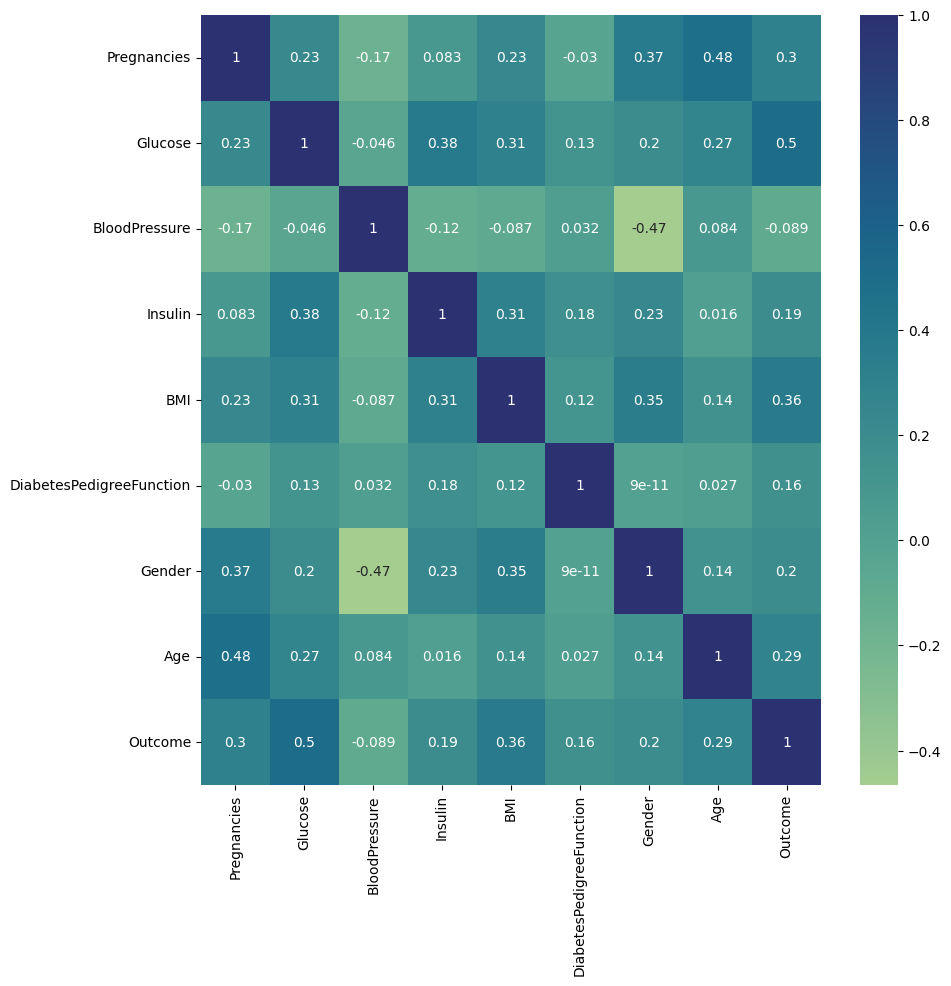

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True, cmap='crest')

In [15]:
sns.pairplot(data,height=10)

<Axes: ylabel='Frequency'>

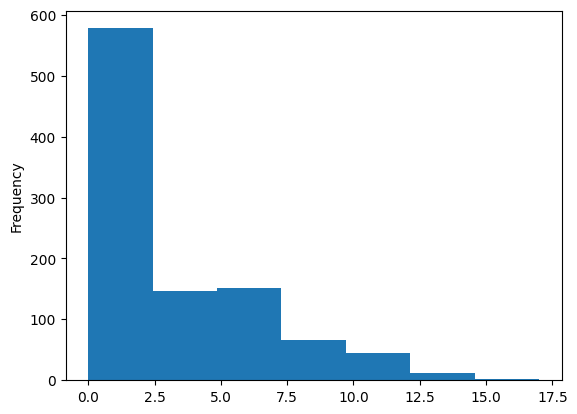

In [16]:
#Histogram
data['Pregnancies'].plot(kind='hist',bins=7)

<Axes: ylabel='Frequency'>

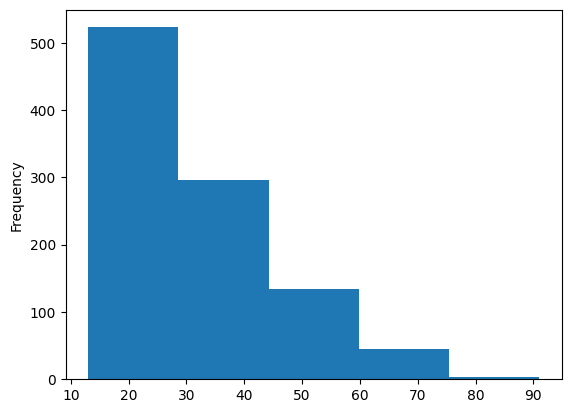

In [17]:
#Histogram
data['Age'].plot(kind='hist',bins=5)

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Gender', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

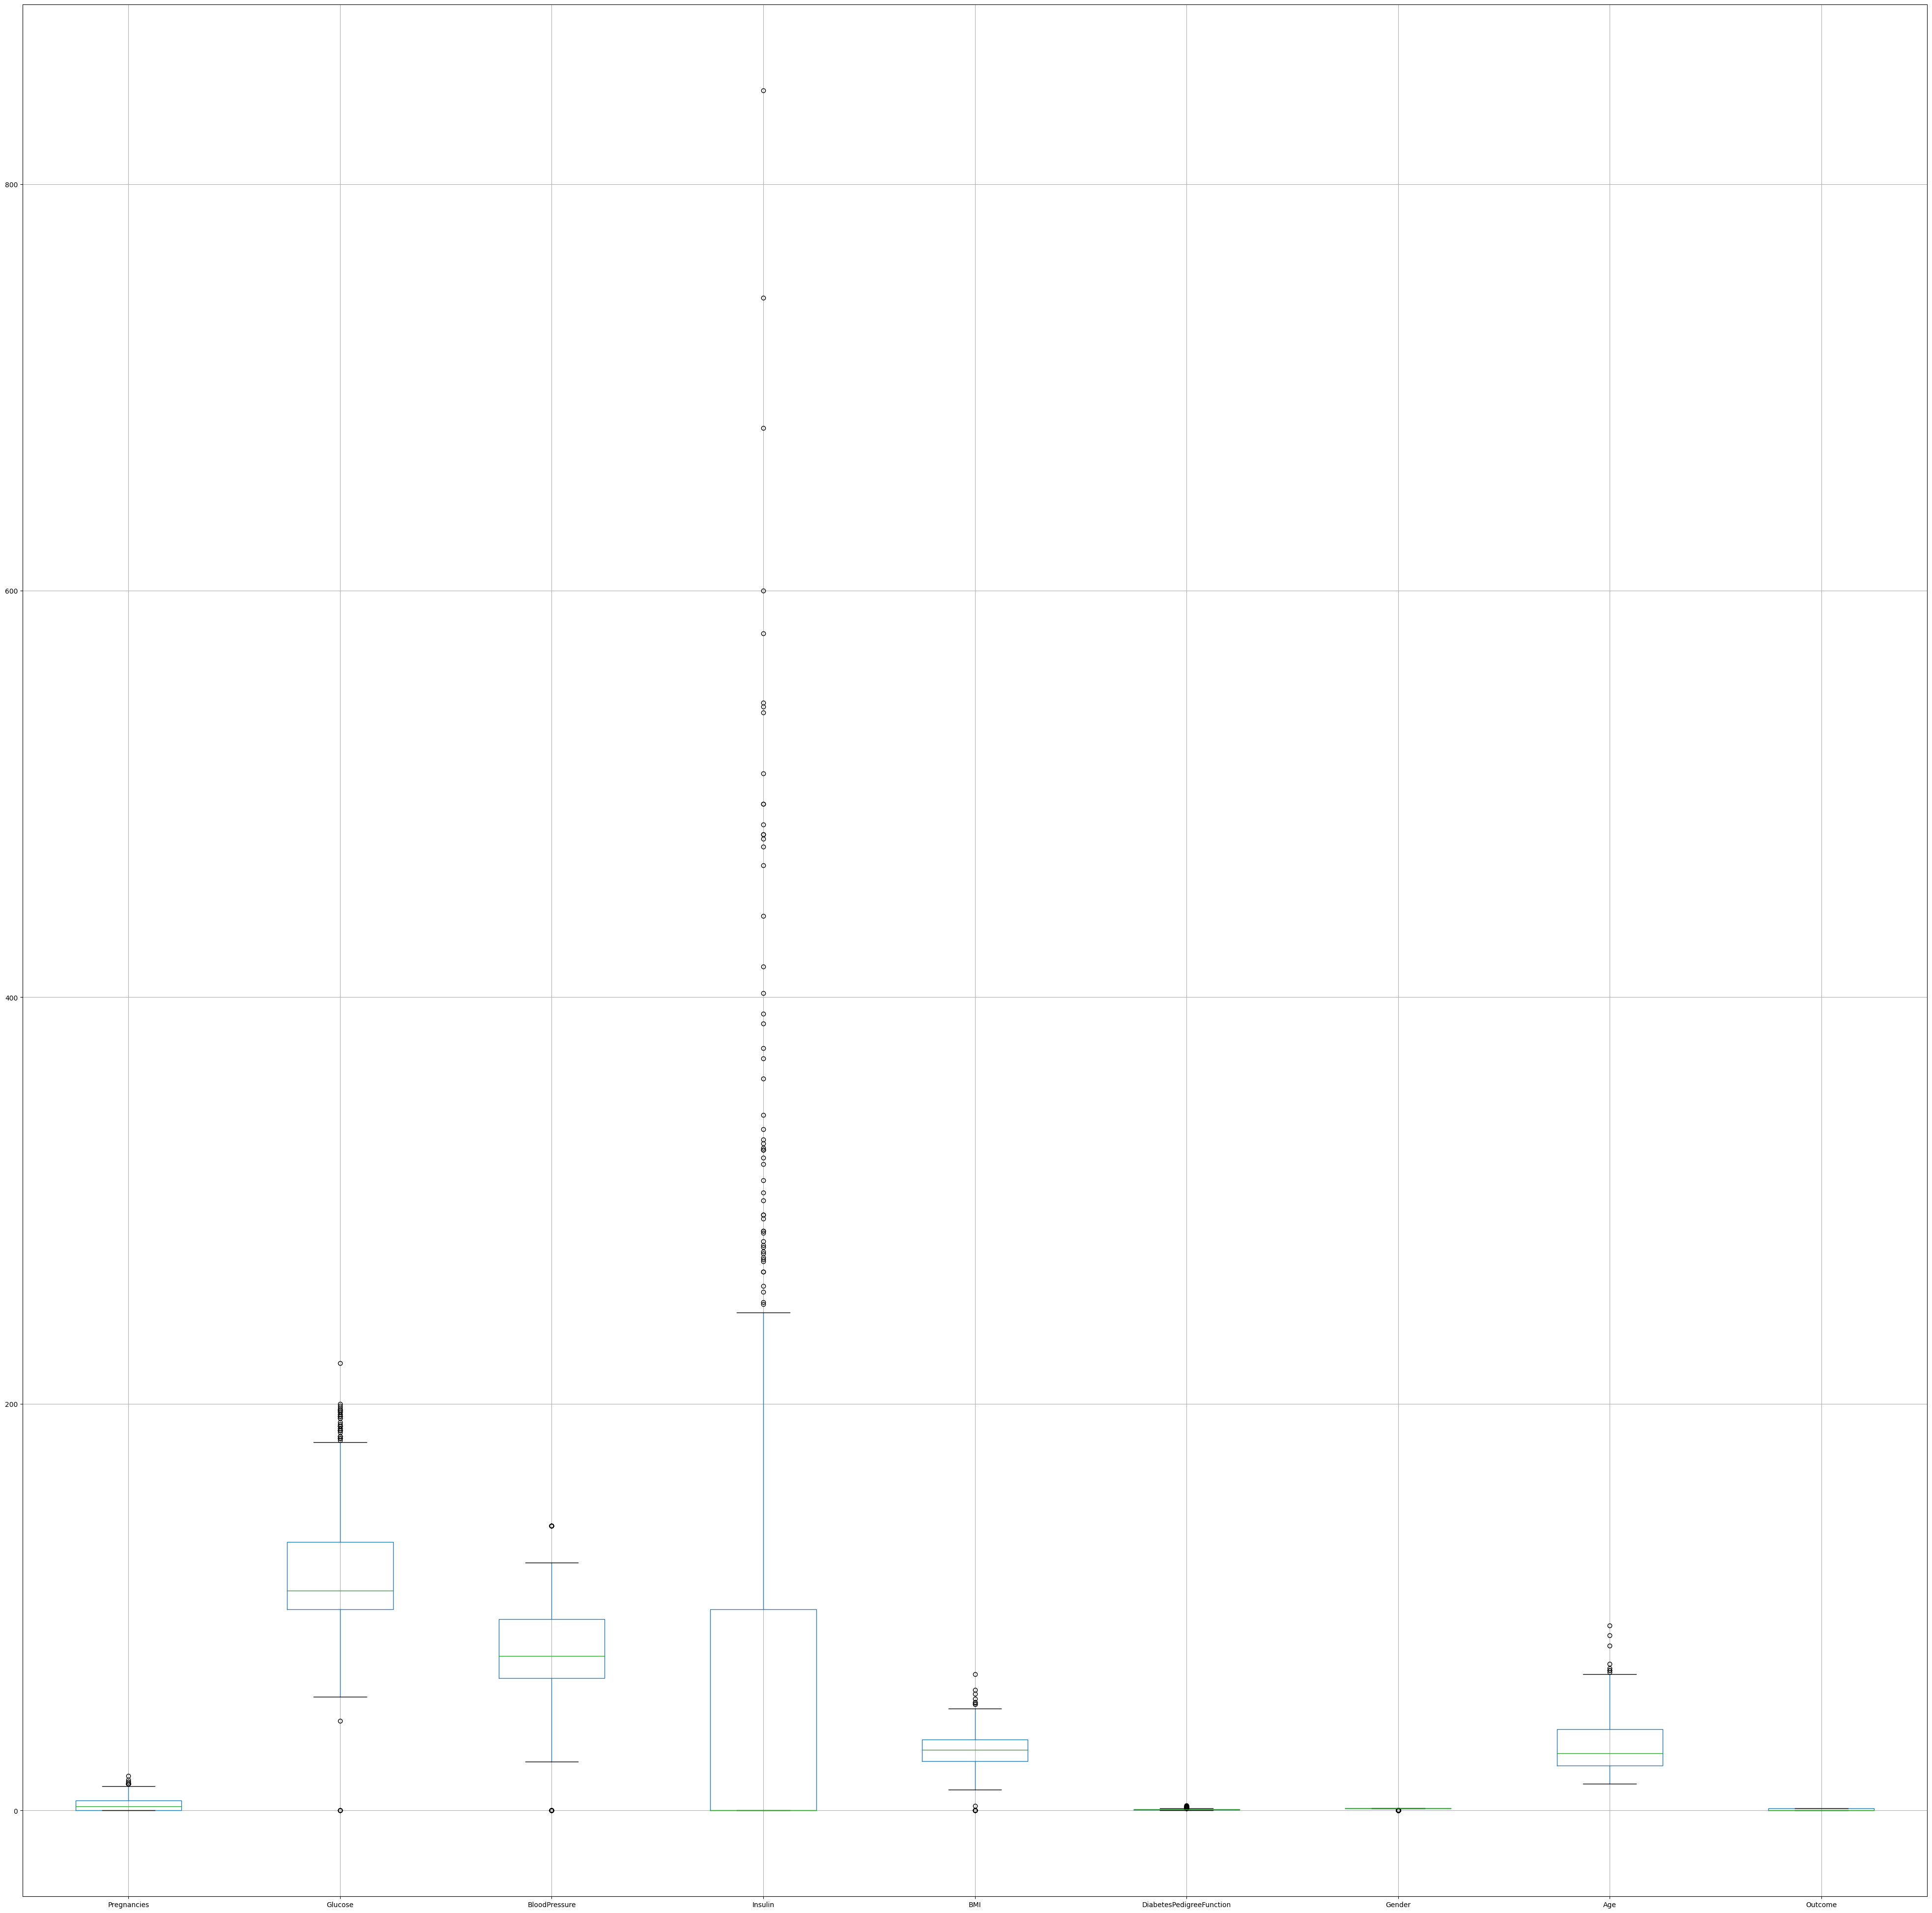

In [19]:
#Plot a Boxplot
plt.figure(figsize=(50,50))
data.boxplot()

# Removing Outliers using percentile method

In [20]:
data.shape

(1001, 10)

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,3.008991,116.498501,76.256743,61.229770,29.863836,0.471876,0.857143,32.173826,0.286713
std,3.336003,29.736547,22.056360,106.416292,8.193191,0.290173,0.350102,12.858062,0.452453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,13.000000,0.000000
25%,0.000000,99.000000,65.000000,0.000000,24.300000,0.265000,1.000000,22.000000,0.000000
50%,2.000000,108.000000,76.000000,0.000000,29.700000,0.471876,1.000000,28.000000,0.000000
75%,5.000000,132.000000,94.000000,99.000000,34.900000,0.539000,1.000000,40.000000,1.000000
max,17.000000,220.000000,140.000000,846.000000,67.100000,2.420000,1.000000,91.000000,1.000000


# Max_threshold

In [22]:
max_threshold=data.Pregnancies.quantile(0.80)

In [23]:
max_threshold

6.0

In [24]:
data[data.Pregnancies>max_threshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
2,8,183,64,0,0,23.3,0.672,1,32,1
7,10,115,0,0,0,35.3,0.134,1,29,0
9,8,125,96,0,0,0.0,0.232,1,54,1
11,10,168,74,0,0,38.0,0.537,1,34,1
12,10,139,80,0,0,27.1,1.441,1,57,0
...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,1,45,1
756,7,137,90,41,0,32.0,0.391,1,39,0
761,9,170,74,31,0,44.0,0.403,1,43,1
762,9,89,62,0,0,22.5,0.142,1,33,0


In [25]:
data2=data[data.Pregnancies<max_threshold]

In [26]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
1,1,85,66,29,0,26.6,0.351000,1,31,0
3,1,89,66,23,94,28.1,0.167000,1,21,0
4,0,137,40,35,168,43.1,2.288000,1,33,1
5,5,116,74,0,0,25.6,0.201000,1,30,0
6,3,78,50,32,88,31.0,0.248000,1,26,1
...,...,...,...,...,...,...,...,...,...,...
996,0,122,100,NaN,0,19.0,0.471876,0,35,0
997,0,99,100,NaN,0,26.9,0.471876,0,29,0
998,4,99,100,NaN,0,27.3,0.471876,1,47,1
999,0,99,100,NaN,0,20.3,0.471876,0,19,0


In [27]:
data2.shape

(782, 10)

In [28]:
data2.Outcome.value_counts()

0    606
1    176
Name: Outcome, dtype: int64

# Machine Learning 

In [29]:
data2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Gender,Age,Outcome
1,1,85,66,29,0,26.6,0.351,1,31,0
3,1,89,66,23,94,28.1,0.167,1,21,0
4,0,137,40,35,168,43.1,2.288,1,33,1
5,5,116,74,0,0,25.6,0.201,1,30,0
6,3,78,50,32,88,31.0,0.248,1,26,1
8,2,197,70,45,543,30.5,0.158,1,53,1
10,4,110,92,0,0,37.6,0.191,1,30,0
13,1,189,60,23,846,30.1,0.398,1,59,1
14,5,166,72,19,175,25.8,0.587,1,51,1
16,0,118,84,47,230,45.8,0.551,1,31,1


In [30]:
x = np.array(data2.drop(['Outcome', 'SkinThickness'], axis=1))
# x=np.array(data2.drop('SkinThickness',axis=1))

y=np.array(data2.Outcome)
#if axis =1 , drop a column
#if axis =0 , drop a row 

In [31]:
x.shape

(782, 8)

# Splitting the Data

In [32]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=524)
# random state:- parameter for arranging the columns , or mixing the columns . 

In [33]:
len(x_train)

586

In [34]:
len(y_train)

586

In [35]:
len(x_test)

196

In [36]:
len(y_test)

196

# Choosing a Particular algorithm(Logistic regression)

In [37]:
logreg = LogisticRegression(max_iter=1000)

# K-Fold Cross Validation

In [38]:
kf=KFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


Cross Validation Scores are [0.78343949 0.72611465 0.83974359 0.87820513 0.91666667]
Average Cross Validation score :0.8288339049485547


# Fitting the model 

In [39]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Prediction

In [40]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
y_pred = logreg.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Accuracy

In [43]:
logreg.score(x_test,y_test)

0.8520408163265306

# SVM

In [44]:
svc=svm.SVC()
import sklearn
svc = sklearn.svm.SVC()
# from sklearn.svm import SVC
# svc = SVC()

In [45]:
svc.fit(x_train,y_train)

SVC()

In [46]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [47]:
y2_pred = svc.predict(x_test)

In [48]:
y2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Accuracy

In [49]:
svc.score(x_test,y_test)

0.826530612244898

# Machine Learning Algo (KNN)

In [50]:
KNN= KNeighborsClassifier(n_neighbors=2)

In [51]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

# Prediction

In [52]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [53]:
y3_pred = KNN.predict(x_test)

In [54]:
y3_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# Accuracy

In [55]:
KNN.score(x_test,y_test)

0.8010204081632653

# DECISION TREE

In [56]:
DT= DecisionTreeClassifier(random_state=55)

In [57]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=55)

In [58]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [59]:
y4_pred = DT.predict(x_test)

In [60]:
y4_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Accuracy

In [61]:
DT.score(x_test,y_test)

0.8775510204081632

# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
RCLF = RandomForestClassifier(n_estimators = 100, random_state = 55)

In [64]:
RCLF.fit(x_train,y_train)

RandomForestClassifier(random_state=55)

In [65]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [66]:
y6_pred=RCLF.predict(x_test)

In [67]:
y6_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Accuracy

In [68]:
RCLF.score(x_test,y_test)

0.8673469387755102

# Gaussian Naive Bayes

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(x_train,y_train)

GaussianNB()

In [71]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [72]:
y7_pred =gnb.predict(x_test)

In [73]:
y7_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [74]:
gnb.score(x_test,y_test)

0.8112244897959183

In [75]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y7_pred).sum()))

Number of mislabeled points out of a total 196 points : 37


# Gradient Boost

In [76]:
GRBC= GradientBoostingClassifier(learning_rate=0.1)

In [77]:
GRBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [78]:
x_test

array([[  0.       ,  99.       ,   0.       , ...,   0.253    ,
          1.       ,  22.       ],
       [  0.       ,  99.       , 100.       , ...,   0.4718763,
          0.       ,  18.       ],
       [  0.       ,  99.       , 100.       , ...,   0.4718763,
          0.       ,  20.       ],
       ...,
       [  5.       ,  95.       ,  72.       , ...,   0.37     ,
          1.       ,  27.       ],
       [  0.       , 161.       ,  50.       , ...,   0.254    ,
          1.       ,  65.       ],
       [  0.       ,  99.       , 100.       , ...,   0.4718763,
          0.       ,  19.       ]])

In [79]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [80]:
y8_pred =GRBC.predict(x_test)

In [81]:
y8_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [82]:
GRBC.score(x_test,y_test)

0.8622448979591837

In [83]:
print(classification_report(y_test,GRBC.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       156
           1       0.74      0.50      0.60        40

    accuracy                           0.86       196
   macro avg       0.81      0.73      0.76       196
weighted avg       0.85      0.86      0.85       196



# XGBoost

In [84]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import xgboost as xgb

In [86]:
xgb_classifier = xgb.XGBClassifier()

In [87]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [89]:
y9_pred= xgb_classifier.predict(x_test)

In [90]:
y9_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
xgb_classifier.score(x_test,y_test)

0.8520408163265306

In [92]:
print(classification_report(y_test,GRBC.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       156
           1       0.74      0.50      0.60        40

    accuracy                           0.86       196
   macro avg       0.81      0.73      0.76       196
weighted avg       0.85      0.86      0.85       196



# Bagging

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
bag_model2 = BaggingClassifier(
    estimator=LogisticRegression(max_iter=10000), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model2.fit(x_train, y_train)
bag_model2.oob_score_

0.8276450511945392

In [95]:
bag_model2.score(x_test, y_test)

0.8571428571428571

# Bagging for Decision Tree

In [96]:
bag_model3 = BaggingClassifier(
    estimator=DT, 
    n_estimators=1000, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model3.fit(x_train, y_train)
bag_model3.oob_score_

0.8174061433447098

In [97]:
bag_model3.score(x_test, y_test)

0.8724489795918368

# USER-INPUT

In [98]:
#USER-INPUT
def get_user_input():
    print("If you don't value then put avg")
    print("""
    
    
    """)
    preg = float(input("Enter number of pregnancies: "))
    glu = float(input("Enter plasma glucose concentration: "))
    if(glu==0):
      glu=data2['Glucose'].mean()
    bp = float(input("Enter diastolic blood pressure: "))
    if(bp==0):
      bp=data2['BloodPressure'].mean()
    insulin = float(input("Enter insulin concentration: "))
    if(insulin==0):
      insulin=data2['Insulin'].mean()
    height = float(input("Enter height (meters): "))
    weight = float(input("Enter weight (kg): "))
    dpf = float(input("Enter diabetes pedigree function: "))
    if(dpf==0):
      dpf=data2['DiabetesPedigreeFunction'].mean()
    age = float(input("Enter age: "))
    bmi=weight/(height*height)
    Gender=int(input("'1' for female and '0' for Male: "))

    # Return user input as a numpy array
    return np.array([[preg, glu, bp, insulin, bmi, dpf,Gender, age]])

# Call your input function to get user input
user_input = get_user_input()

If you don't value then put avg

    
    
    
Enter number of pregnancies: 0
Enter plasma glucose concentration: 12
Enter diastolic blood pressure: 23
Enter insulin concentration: 23
Enter height (meters): 23
Enter weight (kg): 23
Enter diabetes pedigree function: 23
Enter age: 23
'1' for female and '0' for Male: 0


In [105]:
# Pass the user input to your logistic regression model and evaluate the output
#@title  { run: "auto" }
Algo = 'DecisionTree' #@param ["LogisticRegression", "SVM", "KNN","DecisionTree","RandomForestClassifier","GaussianNaiveBayes","GradientBoost","XGBoost","Logistic(Bagging)"] {allow-input: true}
print(Algo)
if Algo =="LogisticRegression":
  print("Accuracy =",logreg.score(x_test,y_test))
  prediction = logreg.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")
elif Algo =="SVM":
  print("Accuracy =",svc.score(x_test,y_test))
  prediction = svc.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")
elif Algo =="KNN":
  print("Accuracy =",KNN.score(x_test,y_test))
  prediction = KNN.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")
elif Algo =="DecisionTree":
  print("Accuracy =",DT.score(x_test,y_test))
  prediction = DT.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")
elif Algo =="RandomForestClassifier":
  print("Accuracy =",RCLF.score(x_test,y_test))
  prediction = RCLF.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")
elif Algo =="GaussianNaiveBayes":
  print("Accuracy =",gnb.score(x_test,y_test))
  prediction = gnb.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")
elif Algo =="GradientBoost":
  print("Accuracy =",GRBC.score(x_test,y_test))
  prediction = GRBC.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")        
elif Algo =="XGBoost":
  print("Accuracy =",xgb_classifier.score(x_test,y_test))
  prediction = xgb_classifier.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")        
elif Algo =="Logistic(Bagging)":
  print("Accuracy =",bag_model2.score(x_test,y_test))
  prediction = bag_model2.predict(user_input)
  if(prediction==[0]):
    print("Congratulations,You do not have diabetes,You are safe")
  else:
    print("OOPS, you have diabetes . No problem,take care. all will be well!!")        

DecisionTree
Accuracy = 0.8775510204081632
Congratulations,You do not have diabetes,You are safe


# PYCARET library

In [100]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00


In [101]:
import pycaret

In [102]:
from pycaret.datasets import get_data

In [107]:
from pycaret.classification import *
exp = setup(data=data, target='Outcome',train_size=0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(1001, 10)"
4,Transformed data shape,"(1001, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(201, 10)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,22.2%


In [108]:
best_model = compare_models(fold=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8038,0.0000,0.5236,0.7194,0.6008,0.4761,0.4894,0.2425
lda,Linear Discriminant Analysis,0.8038,0.8662,0.5411,0.7119,0.6092,0.4824,0.4937,0.1450
lr,Logistic Regression,0.8012,0.8659,0.5324,0.7044,0.6018,0.4739,0.4845,2.3300
et,Extra Trees Classifier,0.8012,0.8587,0.5411,0.6977,0.6060,0.4768,0.4856,0.5050
knn,K Neighbors Classifier,0.7888,0.7961,0.5673,0.6537,0.6049,0.4621,0.4660,0.5875
nb,Naive Bayes,0.7737,0.8338,0.7247,0.5872,0.6478,0.4842,0.4908,0.3325
rf,Random Forest Classifier,0.7712,0.8379,0.3882,0.6855,0.4899,0.3575,0.3844,0.9900
ada,Ada Boost Classifier,0.7700,0.8083,0.4058,0.6785,0.5018,0.3643,0.3882,0.6200
qda,Quadratic Discriminant Analysis,0.7650,0.8325,0.6766,0.5832,0.6235,0.4551,0.4600,0.2475
gbc,Gradient Boosting Classifier,0.7575,0.8123,0.3534,0.6594,0.4526,0.3149,0.3441,0.5875


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

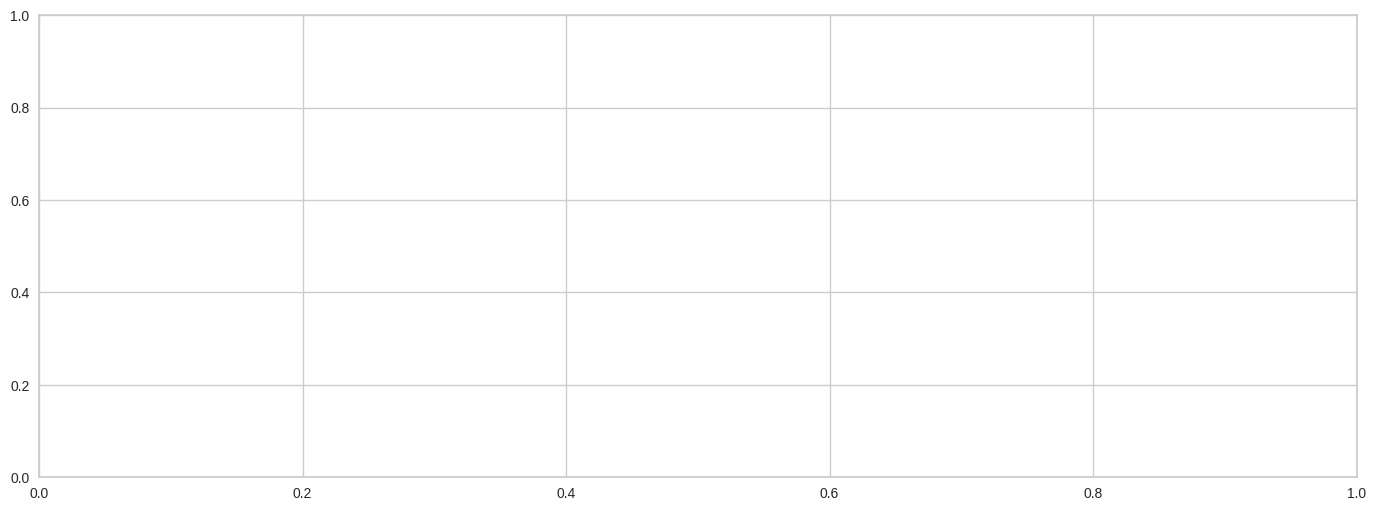

In [109]:
evaluate_model(best_model)

In [110]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.4545,0.7143,0.5556,0.4346,0.4531
1,0.8000,0.0000,0.6087,0.6667,0.6364,0.4988,0.4998
2,0.8750,0.0000,0.6957,0.8421,0.7619,0.6782,0.6839
3,0.7875,0.0000,0.5217,0.6667,0.5854,0.4454,0.4514
4,0.8125,0.0000,0.5217,0.7500,0.6154,0.4966,0.5109
5,0.7500,0.0000,0.3913,0.6000,0.4737,0.3191,0.3317
6,0.8000,0.0000,0.3913,0.8182,0.5294,0.4219,0.4682
7,0.8125,0.0000,0.5652,0.7222,0.6341,0.5106,0.5175
8,0.8750,0.0000,0.7826,0.7826,0.7826,0.6949,0.6949


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [111]:
predictions = predict_model(tuned_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8102,0.7263,0.5296,0.7343,0.6154,0.4937,0.5054


# Ridge Classifier

In [112]:
from sklearn.linear_model import RidgeClassifier
Ridclf = RidgeClassifier()
Ridclf.fit(x_train,y_train)
Ridclf.score(x_test, y_test)

0.8571428571428571